In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [2]:
df = pd.read_csv('archive/lightening_strikes_dataset.csv')

## Discovering

In [3]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
df.shape

(3401012, 3)

In [5]:
df.drop_duplicates().shape # same value means there are no duplicates in this file

(3401012, 3)

In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   date               3401012 non-null  object
 1   number_of_strikes  3401012 non-null  int64 
 2   center_point_geom  3401012 non-null  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [7]:
# Convert date column to datetime
df.date = pd.to_datetime(df.date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [9]:
# days with most lightning strikes
most_strikes_by_date = df.groupby(['date']).sum(['number_of_strikes']).sort_values(by='number_of_strikes', ascending= False).reset_index()
most_strikes_by_date.head(10)

,date,number_of_strikes
0,2018-08-29,1070457
1,2018-08-17,969774
2,2018-08-28,917199
3,2018-08-27,824589
4,2018-08-30,802170
5,2018-08-19,786225
6,2018-08-18,741180
7,2018-08-16,734475
8,2018-08-31,723624
9,2018-08-15,673455


### Extract Month Data

In [10]:
# new month col
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [11]:
df.head()

,date,number_of_strikes,center_point_geom,month,month_name
0,2018-01-03,194,POINT(-75 27),1,January
1,2018-01-03,41,POINT(-78.4 29),1,January
2,2018-01-03,33,POINT(-73.9 27),1,January
3,2018-01-03,38,POINT(-73.8 27),1,January
4,2018-01-03,92,POINT(-79 28),1,January


In [12]:
# months with most strikes
most_strikes_by_month = df.groupby(['month', 'month_name']).sum(['number_of_strikes']).sort_values(by=['number_of_strikes'], ascending = False).reset_index()
most_strikes_by_month

,month,month_name,number_of_strikes
0,8,August,15525255
1,7,July,8320400
2,6,June,6445083
3,5,May,4166726
4,9,September,3018336
5,2,February,2071315
6,4,April,1524339
7,10,October,1093962
8,1,January,860045
9,3,March,854168


# Visualization

In [13]:
df_by_month = df.groupby(['month', 'month_name'])['number_of_strikes'].sum().reset_index()
x = df_by_month['month_name'].str.slice(stop=3)
y = df_by_month.number_of_strikes
df_by_month

,month,month_name,number_of_strikes
0,1,January,860045
1,2,February,2071315
2,3,March,854168
3,4,April,1524339
4,5,May,4166726
5,6,June,6445083
6,7,July,8320400
7,8,August,15525255
8,9,September,3018336
9,10,October,1093962


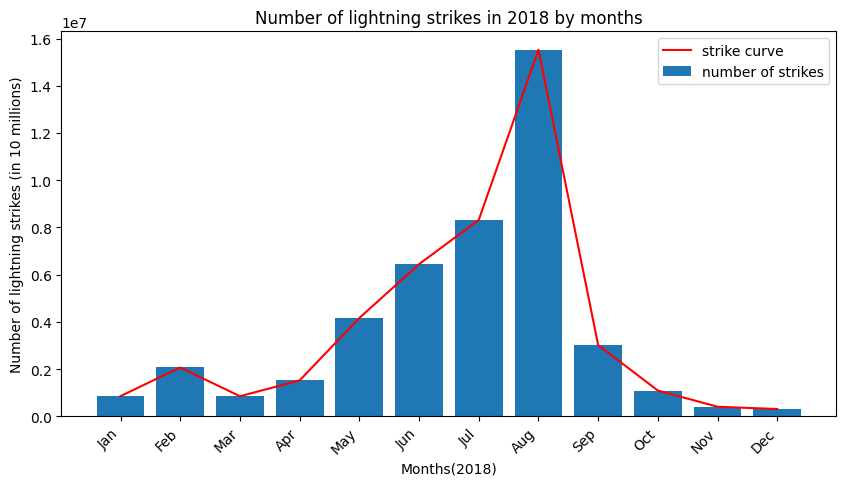

In [14]:
plt.figure(figsize=(10,5))
plt.bar(x=x, height=y, label="number of strikes") # bar graph
plt.plot(x,y, color='red', label='strike curve') # line graph
plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes (in 10 millions)")
plt.title("Number of lightning strikes in 2018 by months")
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend()
plt.show()

#### Strftime params
`%Y` - year

`%m` - month

`%q` - quarter ( use `.dt.to_period('Q')` before it to explain q is about quarter )

`%V` - week


In [15]:
# adding week column
df['week'] = df['date'].dt.strftime('W%V')

In [16]:
df.sample(5)

,date,number_of_strikes,center_point_geom,month,month_name,week
2305105,2018-07-04,5,POINT(-96.7 50.5),7,July,W27
221383,2018-07-26,23,POINT(-103.9 30.7),7,July,W30
2322814,2018-07-18,5,POINT(-70.7 38.8),7,July,W29
1906911,2018-08-19,3,POINT(-79.2 18.3),8,August,W33
2642261,2018-09-11,7,POINT(-99.9 21.3),9,September,W37


In [17]:
# adding quarter column
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('Q%q')

In [18]:
df.sample(5)

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter
2397841,2018-04-10,6,POINT(-100.7 23.5),4,April,W15,Q2
1411358,2018-06-25,2,POINT(-101 23.4),6,June,W26,Q2
2026656,2018-10-13,3,POINT(-96.4 29.5),10,October,W41,Q4
61093,2018-05-15,48,POINT(-97.4 36.9),5,May,W20,Q2
3056838,2018-09-14,13,POINT(-89.9 31),9,September,W37,Q3


### plotting weekly strikes of 2018 bar graph

In [19]:
df_by_week = df.groupby(['week'])['number_of_strikes'].sum().reset_index()


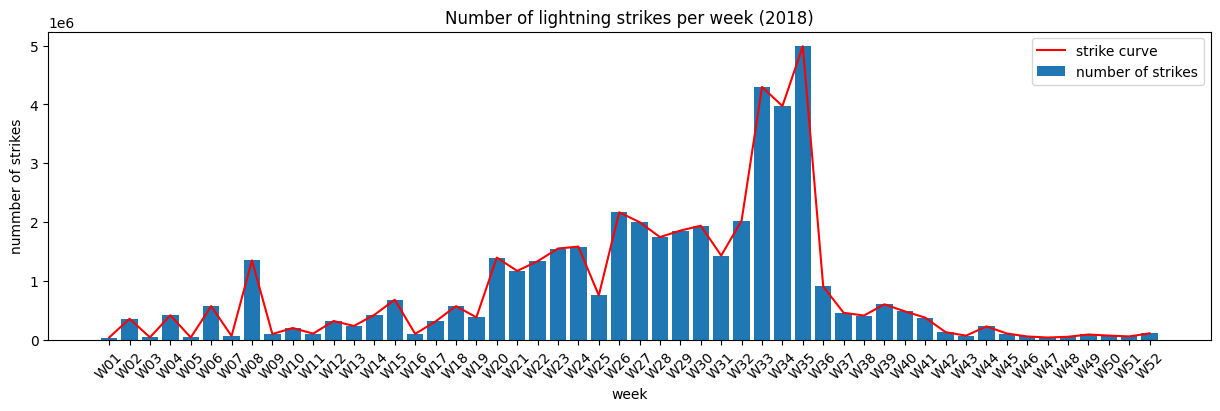

In [20]:
plt.figure(figsize=(15,4))
plt.bar(df_by_week.week, df_by_week.number_of_strikes, label='number of strikes')
plt.plot(df_by_week.week,df_by_week.number_of_strikes, color='red', label='strike curve') # line graph
plt.title('Number of lightning strikes per week (2018)')
plt.xlabel("week")
plt.ylabel("nummber of strikes")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Plotting Quarterly Strikes of 2018 Bar Graph

In [21]:
df_by_Q = df.groupby(['quarter'])['number_of_strikes'].sum().reset_index()

<BarContainer object of 4 artists>

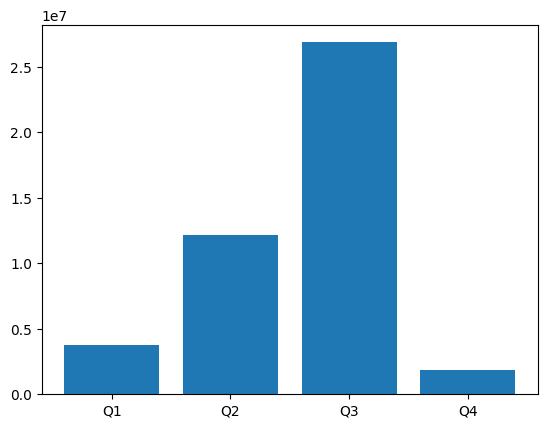

In [22]:
plt.bar(df_by_Q.quarter, df_by_Q.number_of_strikes)

# Structuring The Data

## Sorting

### most strikes in a day

In [23]:
df.sort_values(by="number_of_strikes", ascending=False).head(10)

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter
302758,2018-08-20,2211,POINT(-92.5 35.5),8,August,W34,Q3
278383,2018-08-16,2142,POINT(-96.1 36.1),8,August,W33,Q3
280830,2018-08-17,2061,POINT(-90.2 36.1),8,August,W33,Q3
280453,2018-08-17,2031,POINT(-89.9 35.9),8,August,W33,Q3
278382,2018-08-16,1902,POINT(-96.2 36.1),8,August,W33,Q3
11517,2018-02-10,1899,POINT(-95.5 28.1),2,February,W06,Q1
277506,2018-08-16,1878,POINT(-89.7 31.5),8,August,W33,Q3
24906,2018-02-25,1833,POINT(-98.7 28.9),2,February,W08,Q1
284320,2018-08-17,1767,POINT(-90.1 36),8,August,W33,Q3
24825,2018-02-25,1741,POINT(-98 29),2,February,W08,Q1


### Identifying location that appear most in dataset, ie-most strikes location

In [24]:
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.7 22.9)     107
POINT(-82.5 22.9)     107
POINT(-84.2 22.3)     106
                     ... 
POINT(-130.2 47.4)      1
POINT(-67.5 41.7)       1
POINT(-60.2 44.1)       1
POINT(-117.8 34.6)      1
POINT(-60.4 44.5)       1
Name: count, Length: 170855, dtype: int64

In [25]:
df.center_point_geom.value_counts().head(20).reset_index().style.background_gradient()

,center_point_geom,count
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


we can see that theres no outlier in the data here, therefore the data is normal

## Grouping - Calculating average number of lightning for each weekday

In [26]:
df.head()

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter
0,2018-01-03,194,POINT(-75 27),1,January,W01,Q1
1,2018-01-03,41,POINT(-78.4 29),1,January,W01,Q1
2,2018-01-03,33,POINT(-73.9 27),1,January,W01,Q1
3,2018-01-03,38,POINT(-73.8 27),1,January,W01,Q1
4,2018-01-03,92,POINT(-79 28),1,January,W01,Q1


In [27]:
df['weekday'] = df.date.dt.day_name()

In [28]:
df.sample(5)

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter,weekday
905069,2018-07-27,1,POINT(-84.6 27.6),7,July,W30,Q3,Friday
942345,2018-08-02,1,POINT(-112.6 41.6),8,August,W31,Q3,Thursday
3088949,2018-08-09,14,POINT(-71.9 47.1),8,August,W32,Q3,Thursday
812232,2018-07-10,1,POINT(-111.6 38.7),7,July,W28,Q3,Tuesday
2150232,2018-07-16,4,POINT(-86.2 27.6),7,July,W29,Q3,Monday


In [29]:
# calculate mean of strikes
df[['weekday','number_of_strikes']].groupby('weekday').mean().sort_values(by='number_of_strikes', ascending=False)

,number_of_strikes
weekday,
Tuesday,13.813599
Friday,13.349972
Thursday,13.240594
Wednesday,13.224568
Monday,13.152804
Saturday,12.732694
Sunday,12.324717


## Box Plot
data visualization that depicts the locality, spread and skew of group of values within quartiles

Text(0.5, 1.0, 'strike distrib')

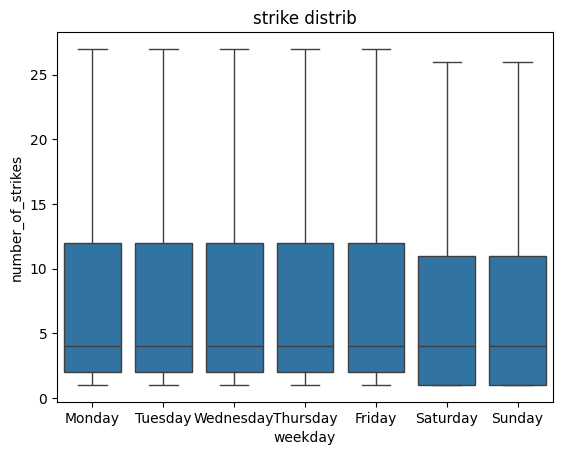

In [30]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = sns.boxplot(data=df, x='weekday',y='number_of_strikes',order=week_order,showfliers=False)
g.set_title("strike distrib")

In [31]:
df.head()

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter,weekday
0,2018-01-03,194,POINT(-75 27),1,January,W01,Q1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,January,W01,Q1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,January,W01,Q1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,January,W01,Q1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,January,W01,Q1,Wednesday


## Adding longitude and latitude columns

### string manipulation for extraction of geoms

In [32]:
cleaned_geom_series = df['center_point_geom'].str.replace('POINT(', '', regex=False).str.replace(')', '', regex=False)

In [33]:
splited_geom_series = cleaned_geom_series.str.split(' ')

In [34]:
df['Longitude'] = [splited_geom_series[i][0] for i in range(len(df))]
df['Latitude'] = [splited_geom_series[i][1] for i in range(len(df))]

In [35]:
df.head()

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter,weekday,Longitude,Latitude
0,2018-01-03,194,POINT(-75 27),1,January,W01,Q1,Wednesday,-75,27
1,2018-01-03,41,POINT(-78.4 29),1,January,W01,Q1,Wednesday,-78.4,29
2,2018-01-03,33,POINT(-73.9 27),1,January,W01,Q1,Wednesday,-73.9,27
3,2018-01-03,38,POINT(-73.8 27),1,January,W01,Q1,Wednesday,-73.8,27
4,2018-01-03,92,POINT(-79 28),1,January,W01,Q1,Wednesday,-79,28


In [36]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
month                0
month_name           0
week                 0
quarter              0
weekday              0
Longitude            0
Latitude             0
dtype: int64

In [37]:
strikes_by_coord = df[['Longitude','Latitude','number_of_strikes']].groupby(['Longitude','Latitude']).sum().sort_values(by='number_of_strikes',ascending=False).reset_index()

In [38]:
strikes_by_coord.head(10)

,Longitude,Latitude,number_of_strikes
0,-84.2,22.4,5469
1,-82.9,22.9,4527
2,-82.3,22.9,4506
3,-82.4,22.9,4456
4,-84.1,22.5,4421
5,-82.2,22.9,4230
6,-84.3,22.4,4077
7,-84.2,22.5,4074
8,-84.3,22.3,4020
9,-84.1,22.4,3910


<Axes: ylabel='number_of_strikes'>

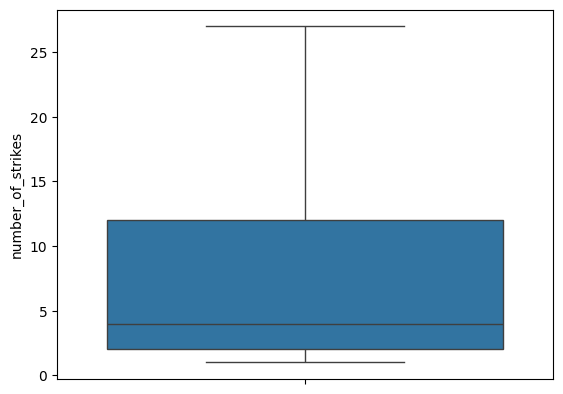

In [39]:
sns.boxplot(data=df.number_of_strikes,showfliers=False)

## Identifying Outliers

In [40]:
percentile25 = df['number_of_strikes'].quantile(0.25)
percentile75 = df['number_of_strikes'].quantile(0.75)

iqr = percentile75 - percentile25 # inter quartile range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


In [41]:
df_by_month.head()

,month,month_name,number_of_strikes
0,1,January,860045
1,2,February,2071315
2,3,March,854168
3,4,April,1524339
4,5,May,4166726


## Label Encoding 

In [42]:
df_by_month['strike_level'] = pd.qcut(df_by_month['number_of_strikes'],4,labels=['Mild','Scattered','Heavy','Severe'])

In [43]:
df_by_month

,month,month_name,number_of_strikes,strike_level
0,1,January,860045,Scattered
1,2,February,2071315,Heavy
2,3,March,854168,Mild
3,4,April,1524339,Scattered
4,5,May,4166726,Heavy
5,6,June,6445083,Severe
6,7,July,8320400,Severe
7,8,August,15525255,Severe
8,9,September,3018336,Heavy
9,10,October,1093962,Scattered


In [44]:
df_by_month['strike_level'].value_counts()

strike_level
Mild         3
Scattered    3
Heavy        3
Severe       3
Name: count, dtype: int64

In [46]:
## assign numerical values to these cat labels
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month

,month,month_name,number_of_strikes,strike_level,strike_level_code
0,1,January,860045,Scattered,1
1,2,February,2071315,Heavy,2
2,3,March,854168,Mild,0
3,4,April,1524339,Scattered,1
4,5,May,4166726,Heavy,2
5,6,June,6445083,Severe,3
6,7,July,8320400,Severe,3
7,8,August,15525255,Severe,3
8,9,September,3018336,Heavy,2
9,10,October,1093962,Scattered,1


In [49]:
pd.get_dummies(df_by_month['strike_level'])

,Mild,Scattered,Heavy,Severe
0,False,True,False,False
1,False,False,True,False
2,True,False,False,False
3,False,True,False,False
4,False,False,True,False
5,False,False,False,True
6,False,False,False,True
7,False,False,False,True
8,False,False,True,False
9,False,True,False,False


In [66]:
df_by_month_plot = df_by_month.pivot(columns=['month_name','strike_level','strike_level_code'])
df_by_month_plot

month                                               \
month_name          January February March     April   May   June   July   
strike_level      Scattered    Heavy  Mild Scattered Heavy Severe Severe   
strike_level_code         1        2     0         1     2      3      3   
0                       1.0      NaN   NaN       NaN   NaN    NaN    NaN   
1                       NaN      2.0   NaN       NaN   NaN    NaN    NaN   
2                       NaN      NaN   3.0       NaN   NaN    NaN    NaN   
3                       NaN      NaN   NaN       4.0   NaN    NaN    NaN   
4                       NaN      NaN   NaN       NaN   5.0    NaN    NaN   
5                       NaN      NaN   NaN       NaN   NaN    6.0    NaN   
6                       NaN      NaN   NaN       NaN   NaN    NaN    7.0   
7                       NaN      NaN   NaN       NaN   NaN    NaN    NaN   
8                       NaN      NaN   NaN       NaN   NaN    NaN    NaN   
9                       NaN      NaN   NaN       NaN   NaN    NaN    NaN   
10                      NaN      NaN   NaN       NaN   NaN    NaN    NaN   
11                      NaN      NaN   NaN       NaN   NaN    NaN    NaN   

                                              ... number_of_strikes  \
month_name        August September   October  ...             March   
strike_level      Severe     Heavy Scattered  ...              Mild   
strike_level_code      3         2         1  ...                 0   
0                    NaN       NaN       NaN  ...               NaN   
1                    NaN       NaN       NaN  ...               NaN   
2                    NaN       NaN       NaN  ...          854168.0   
3                    NaN       NaN       NaN  ...               NaN   
4                    NaN       NaN       NaN  ...               NaN   
5                    NaN       NaN       NaN  ...               NaN   
6                    NaN       NaN       NaN  ...               NaN   
7                    8.0       NaN       NaN  ...               NaN   
8                    NaN       9.0       NaN  ...               NaN   
9                    NaN       NaN      10.0  ...               NaN   
10                   NaN       NaN       NaN  ...               NaN   
11                   NaN       NaN       NaN  ...               NaN   

                                                                           \
month_name             April        May       June       July      August   
strike_level       Scattered      Heavy     Severe     Severe      Severe   
strike_level_code          1          2          3          3           3   
0                        NaN        NaN        NaN        NaN         NaN   
1                        NaN        NaN        NaN        NaN         NaN   
2                        NaN        NaN        NaN        NaN         NaN   
3                  1524339.0        NaN        NaN        NaN         NaN   
4                        NaN  4166726.0        NaN        NaN         NaN   
5                        NaN        NaN  6445083.0        NaN         NaN   
6                        NaN        NaN        NaN  8320400.0         NaN   
7                        NaN        NaN        NaN        NaN  15525255.0   
8                        NaN        NaN        NaN        NaN         NaN   
9                        NaN        NaN        NaN        NaN         NaN   
10                       NaN        NaN        NaN        NaN         NaN   
11                       NaN        NaN        NaN        NaN         NaN   

                                                             
month_name         September    October  November  December  
strike_level           Heavy  Scattered      Mild      Mild  
strike_level_code          2          1         0         0  
0                        NaN        NaN       NaN       NaN  
1                        NaN        NaN       NaN       NaN  
2                        NaN        NaN       NaN       NaN  
3

<Axes: xlabel='None-month_name-strike_level-strike_level_code'>

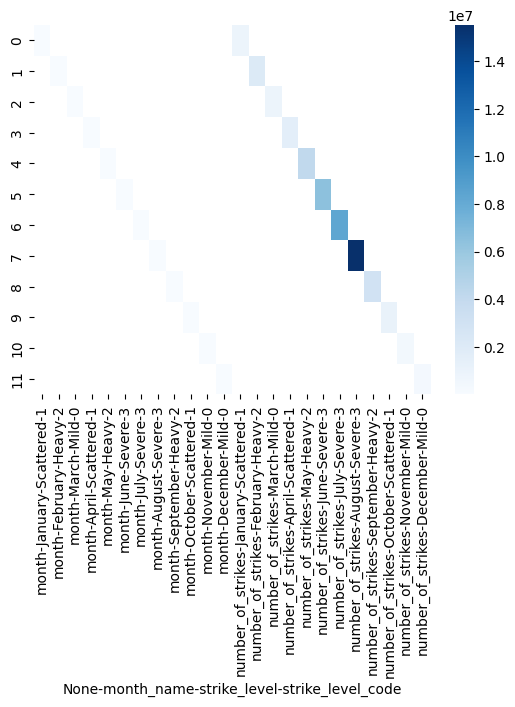

In [67]:
sns.heatmap(df_by_month_plot,cmap='Blues')